In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
languages = ["sw", "ta", "tr", "id", "zh"]

epochs = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "best"]

setups_random = ["seed1", "seed2", "seed3"]
setups_smart_selection = ["1", "2", "3"]

In [4]:
path_to_repo = "/mnt/nas_home/mrgj4/final_repo/thesis-code/"

In [7]:
lang_results = {}

for lang in languages:

    setup_results = {}

    epoch_results = {}
    for epoch in epochs:
        with open(path_to_repo + "experiment_1/{l}/baseline/test/pytorch_model_{e}.bin-/eval.txt".format(l = lang,
                                                                                                            e = epoch)) as f:
            lines = f.readlines()
            score = float(lines[0].split(" ")[-2])
            epoch_results[epoch] = score
    setup_results["baseline"] = epoch_results


    for setup in setups_random:
        epoch_results = {}
        for epoch in epochs:
            with open(path_to_repo + "experiment_1/{l}/{s}/test/pytorch_model_{e}.bin-/eval.txt".format(l = lang,
                                                                                                            s = setup,
                                                                                                            e = epoch)) as f:
                lines = f.readlines()
                score = float(lines[0].split(" ")[-2])
                epoch_results[epoch] = score
        setup_results[setup] = epoch_results

    if lang != "sw":
        for setup in setups_smart_selection:
            epoch_results = {}
            for epoch in epochs:
                with open(path_to_repo + "experiment_1/{l}/smart_selection/test_{s}/pytorch_model_{e}.bin-/eval.txt".format(l = lang,
                                                                                                                s = setup,
                                                                                                                e = epoch)) as f:
                    lines = f.readlines()
                    score = float(lines[0].split(" ")[-2])
                    epoch_results[epoch] = score
            setup_results["smart_selection_" + setup] = epoch_results

    lang_results[lang] = setup_results

In [38]:
def get_random_data_best_avg(lang, lang_results):
    results = lang_results[lang]

    best_results = np.asarray([results["seed1"]["best"],
                               results["seed2"]["best"], 
                               results["seed3"]["best"]])

    return best_results.mean(), best_results.std()

In [39]:
def get_smart_selection_best_avg(lang, lang_results):
    results = lang_results[lang]

    best_results = np.asarray([results["smart_selection_1"]["best"],
                               results["smart_selection_2"]["best"], 
                               results["smart_selection_3"]["best"]])

    return best_results.mean(), best_results.std()

In [40]:
def get_smart_selection_data_avg_std(lang, lang_results):
    results = lang_results[lang]

    means = []
    stds = []

    for epoch in epochs:
        if epoch != "best":
            epoch_results = np.asarray([results["smart_selection_1"][epoch],
                                        results["smart_selection_2"][epoch], 
                                        results["smart_selection_3"][epoch]])
            means.append(epoch_results.mean())
            stds.append(epoch_results.std())
    
    return means, stds

In [41]:
def get_random_data_avg_std(lang, lang_results):
    results = lang_results[lang]

    means = []
    stds = []

    for epoch in epochs:
        if epoch != "best":
            epoch_results = np.asarray([results["seed1"][epoch], results["seed2"][epoch], results["seed3"][epoch]])
            means.append(epoch_results.mean())
            stds.append(epoch_results.std())
    
    return means, stds

In [42]:
def get_baseline_results(lang, lang_results):
    results = lang_results[lang]

    results_list = [val for key, val in results["baseline"].items() if key != "best"]

    # for key, val in results["baseline"].items():
    #     print(key)

    return results_list


In [51]:
def plot_results(lang, baseline, random_means, random_stds, selected_means = None, selected_stds = None):
    # Set figure default figure size
    plt.rcParams["figure.figsize"] = (15, 8)
    plt.rcParams['figure.dpi'] = 300

    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    y_random = np.asarray(random_means)
    if selected_means:
        y_selected = np.asarray(selected_means)

    plt.plot(x, baseline, linestyle="--", marker="o", color="darkblue", markersize=10, label="baseline")

    plt.plot(x, y_random, linestyle="-", marker="o", color="red", markersize=10, label="WIT pretraining w/ random entries")
    if selected_means:
        plt.plot(x, y_selected, linestyle="-", marker="o", color="limegreen", markersize=10, label="WIT pretraining w/ selected entries")

    plt.fill_between(x, y_random-random_stds, y_random+random_stds, color="lightcoral", alpha=0.2)
    if selected_means:
        plt.fill_between(x, y_selected-selected_stds, y_selected+selected_stds, color="lightgreen", alpha=0.2)

    plt.xlabel("Epoch")
    plt.title("{l}".format(l = lang))
    plt.ylabel("Accuracy (%)")
    plt.ylim([50, 60])
    plt.legend()
    plt.grid(axis="both")
    plt.show()

## SW

Baseline best performance

In [44]:
lang_results["sw"]["baseline"]["best"]

52.076

Random data selection best performance

In [45]:
get_random_data_best_avg("sw", lang_results)

(54.211666666666666, 0.2974562526191411)

In [46]:
random_means_sw, random_stds_sw = get_random_data_avg_std("sw", lang_results)
baseline_sw = get_baseline_results("sw", lang_results)

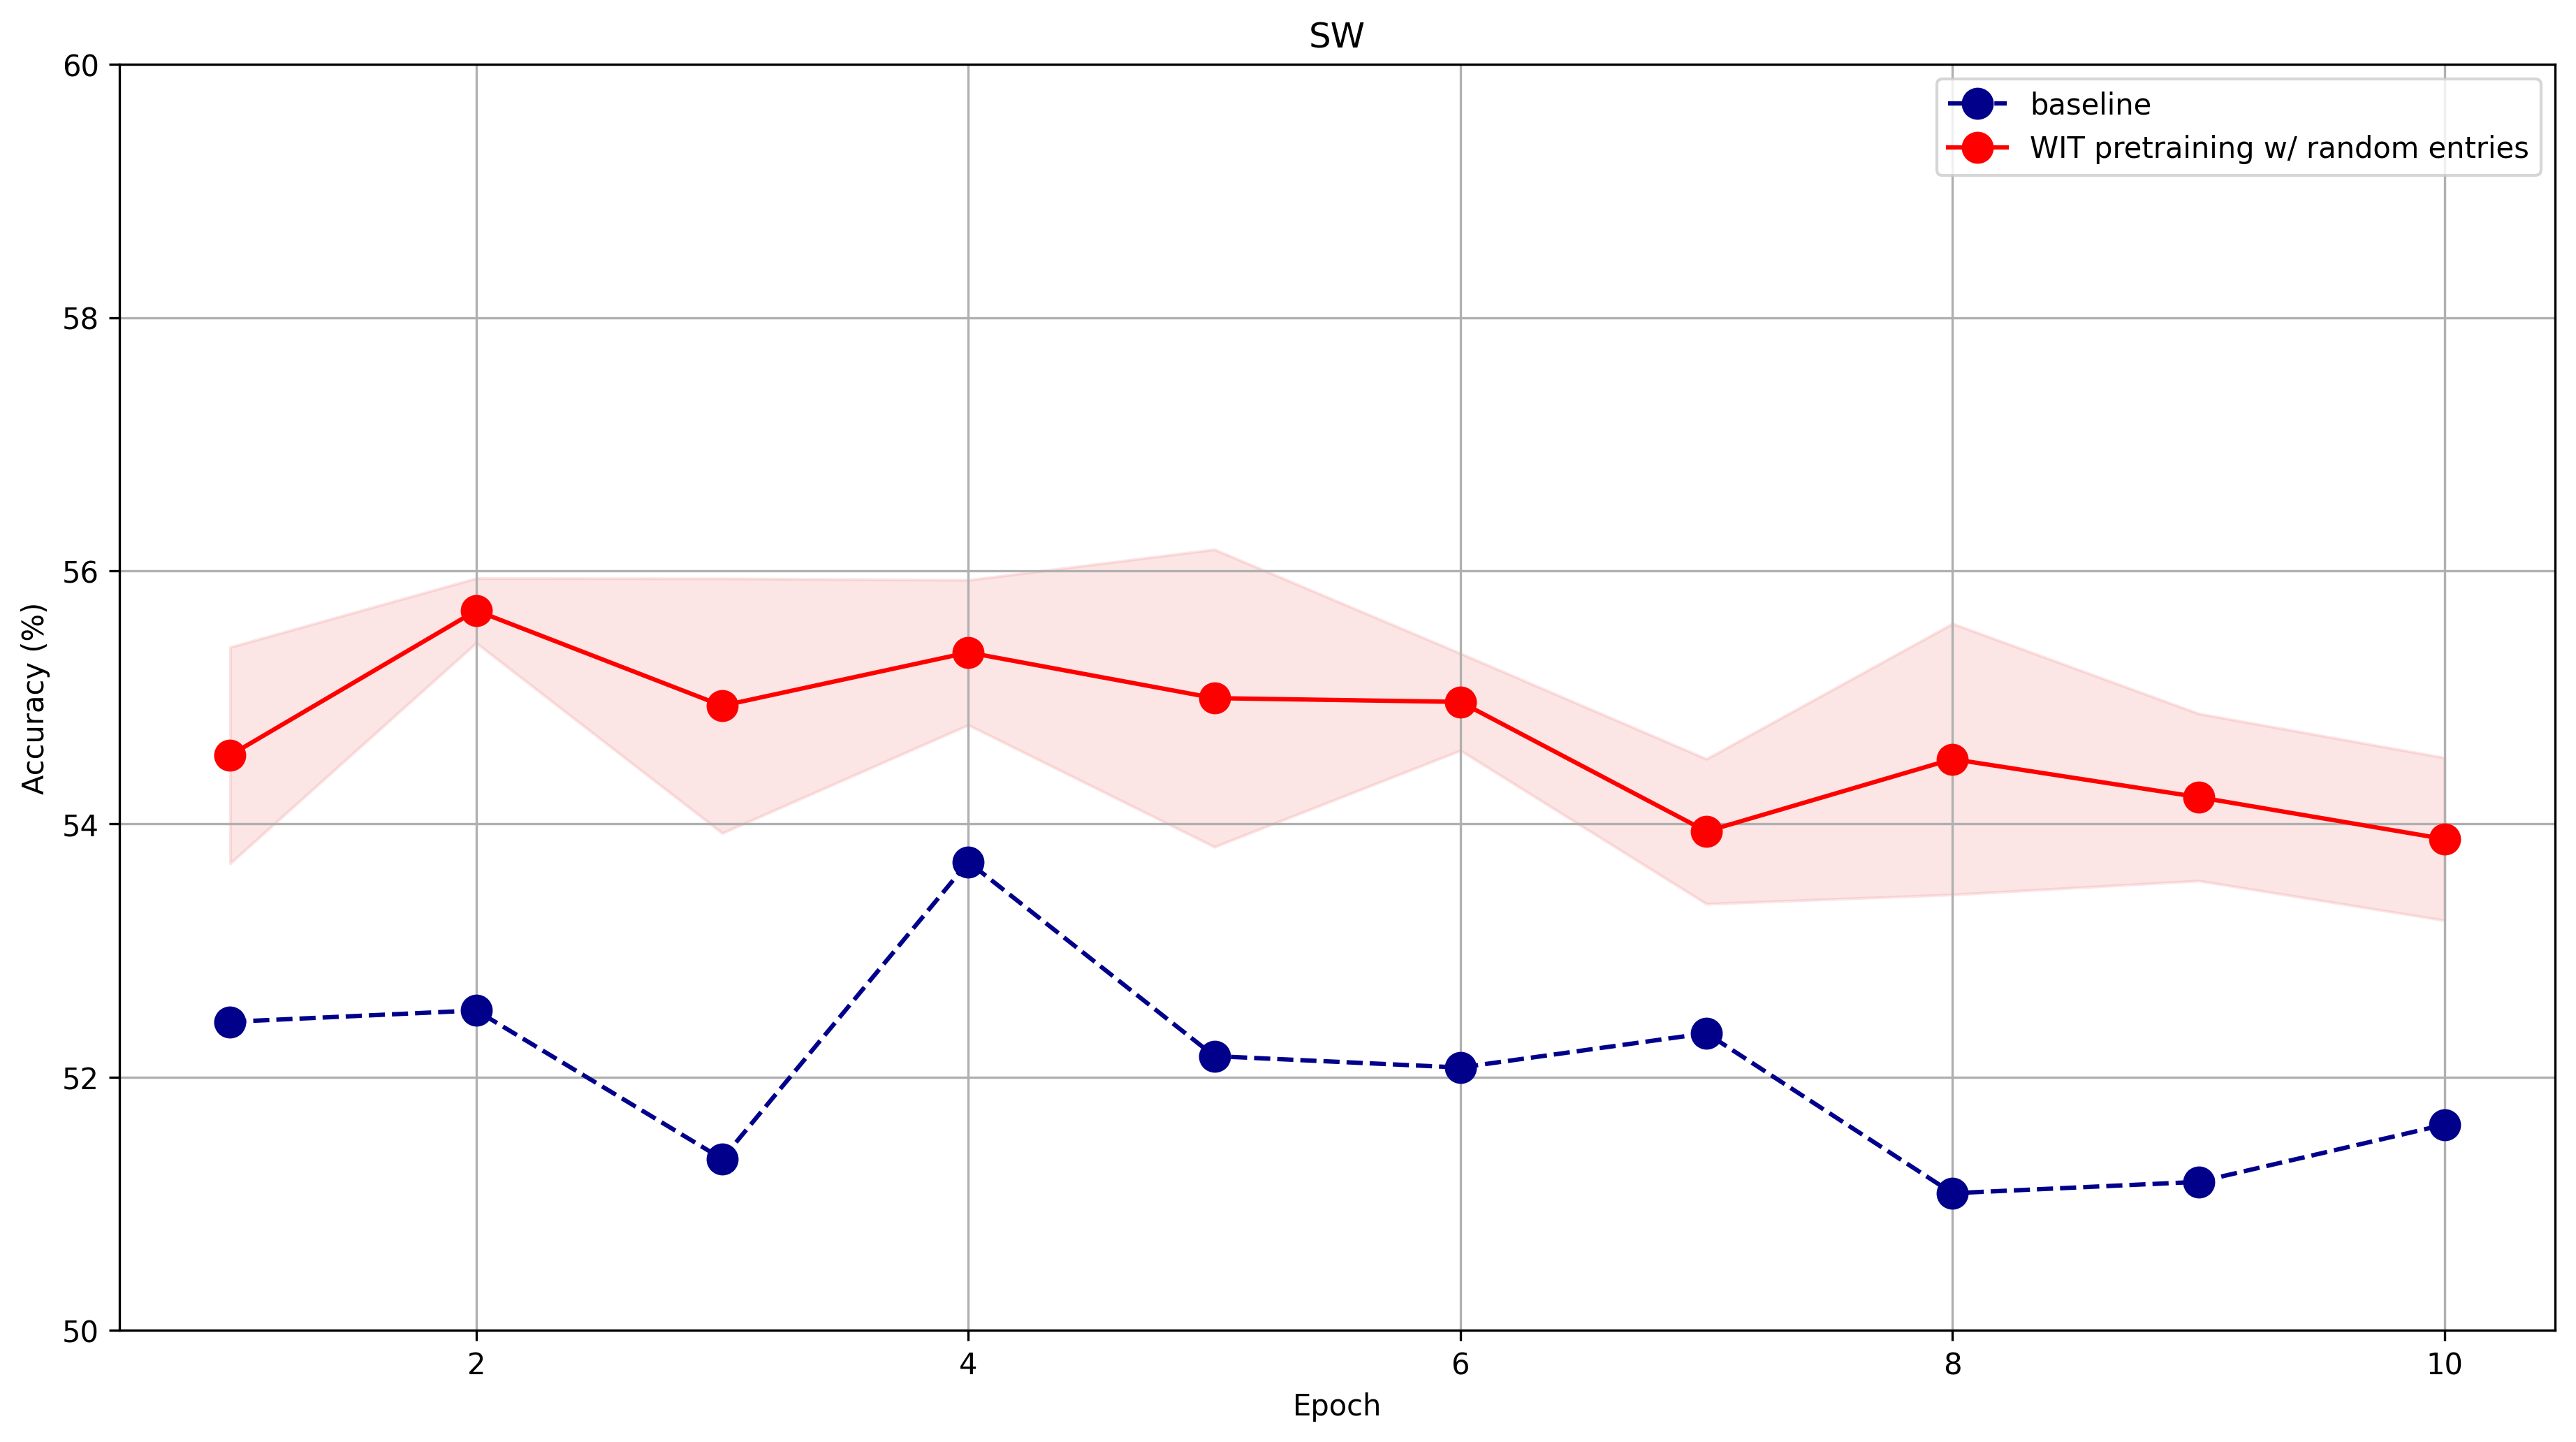

In [52]:
plot_results("SW", baseline_sw, random_means_sw, random_stds_sw)

## TA

Baseline best performance

In [24]:
lang_results["ta"]["baseline"]["best"]

52.013

Random data selection best performance

In [15]:
get_random_data_best_avg("ta", lang_results)

(53.489, 0.6583879302255398)

Smart selection data selection best performance

In [53]:
get_smart_selection_best_avg("ta", lang_results)

(53.32833333333334, 0.46165812266462186)

In [54]:
random_means_ta, random_stds_ta = get_random_data_avg_std("ta", lang_results)
selected_means_ta, selected_stds_ta = get_smart_selection_data_avg_std("ta", lang_results)
baseline_ta = get_baseline_results("ta", lang_results)

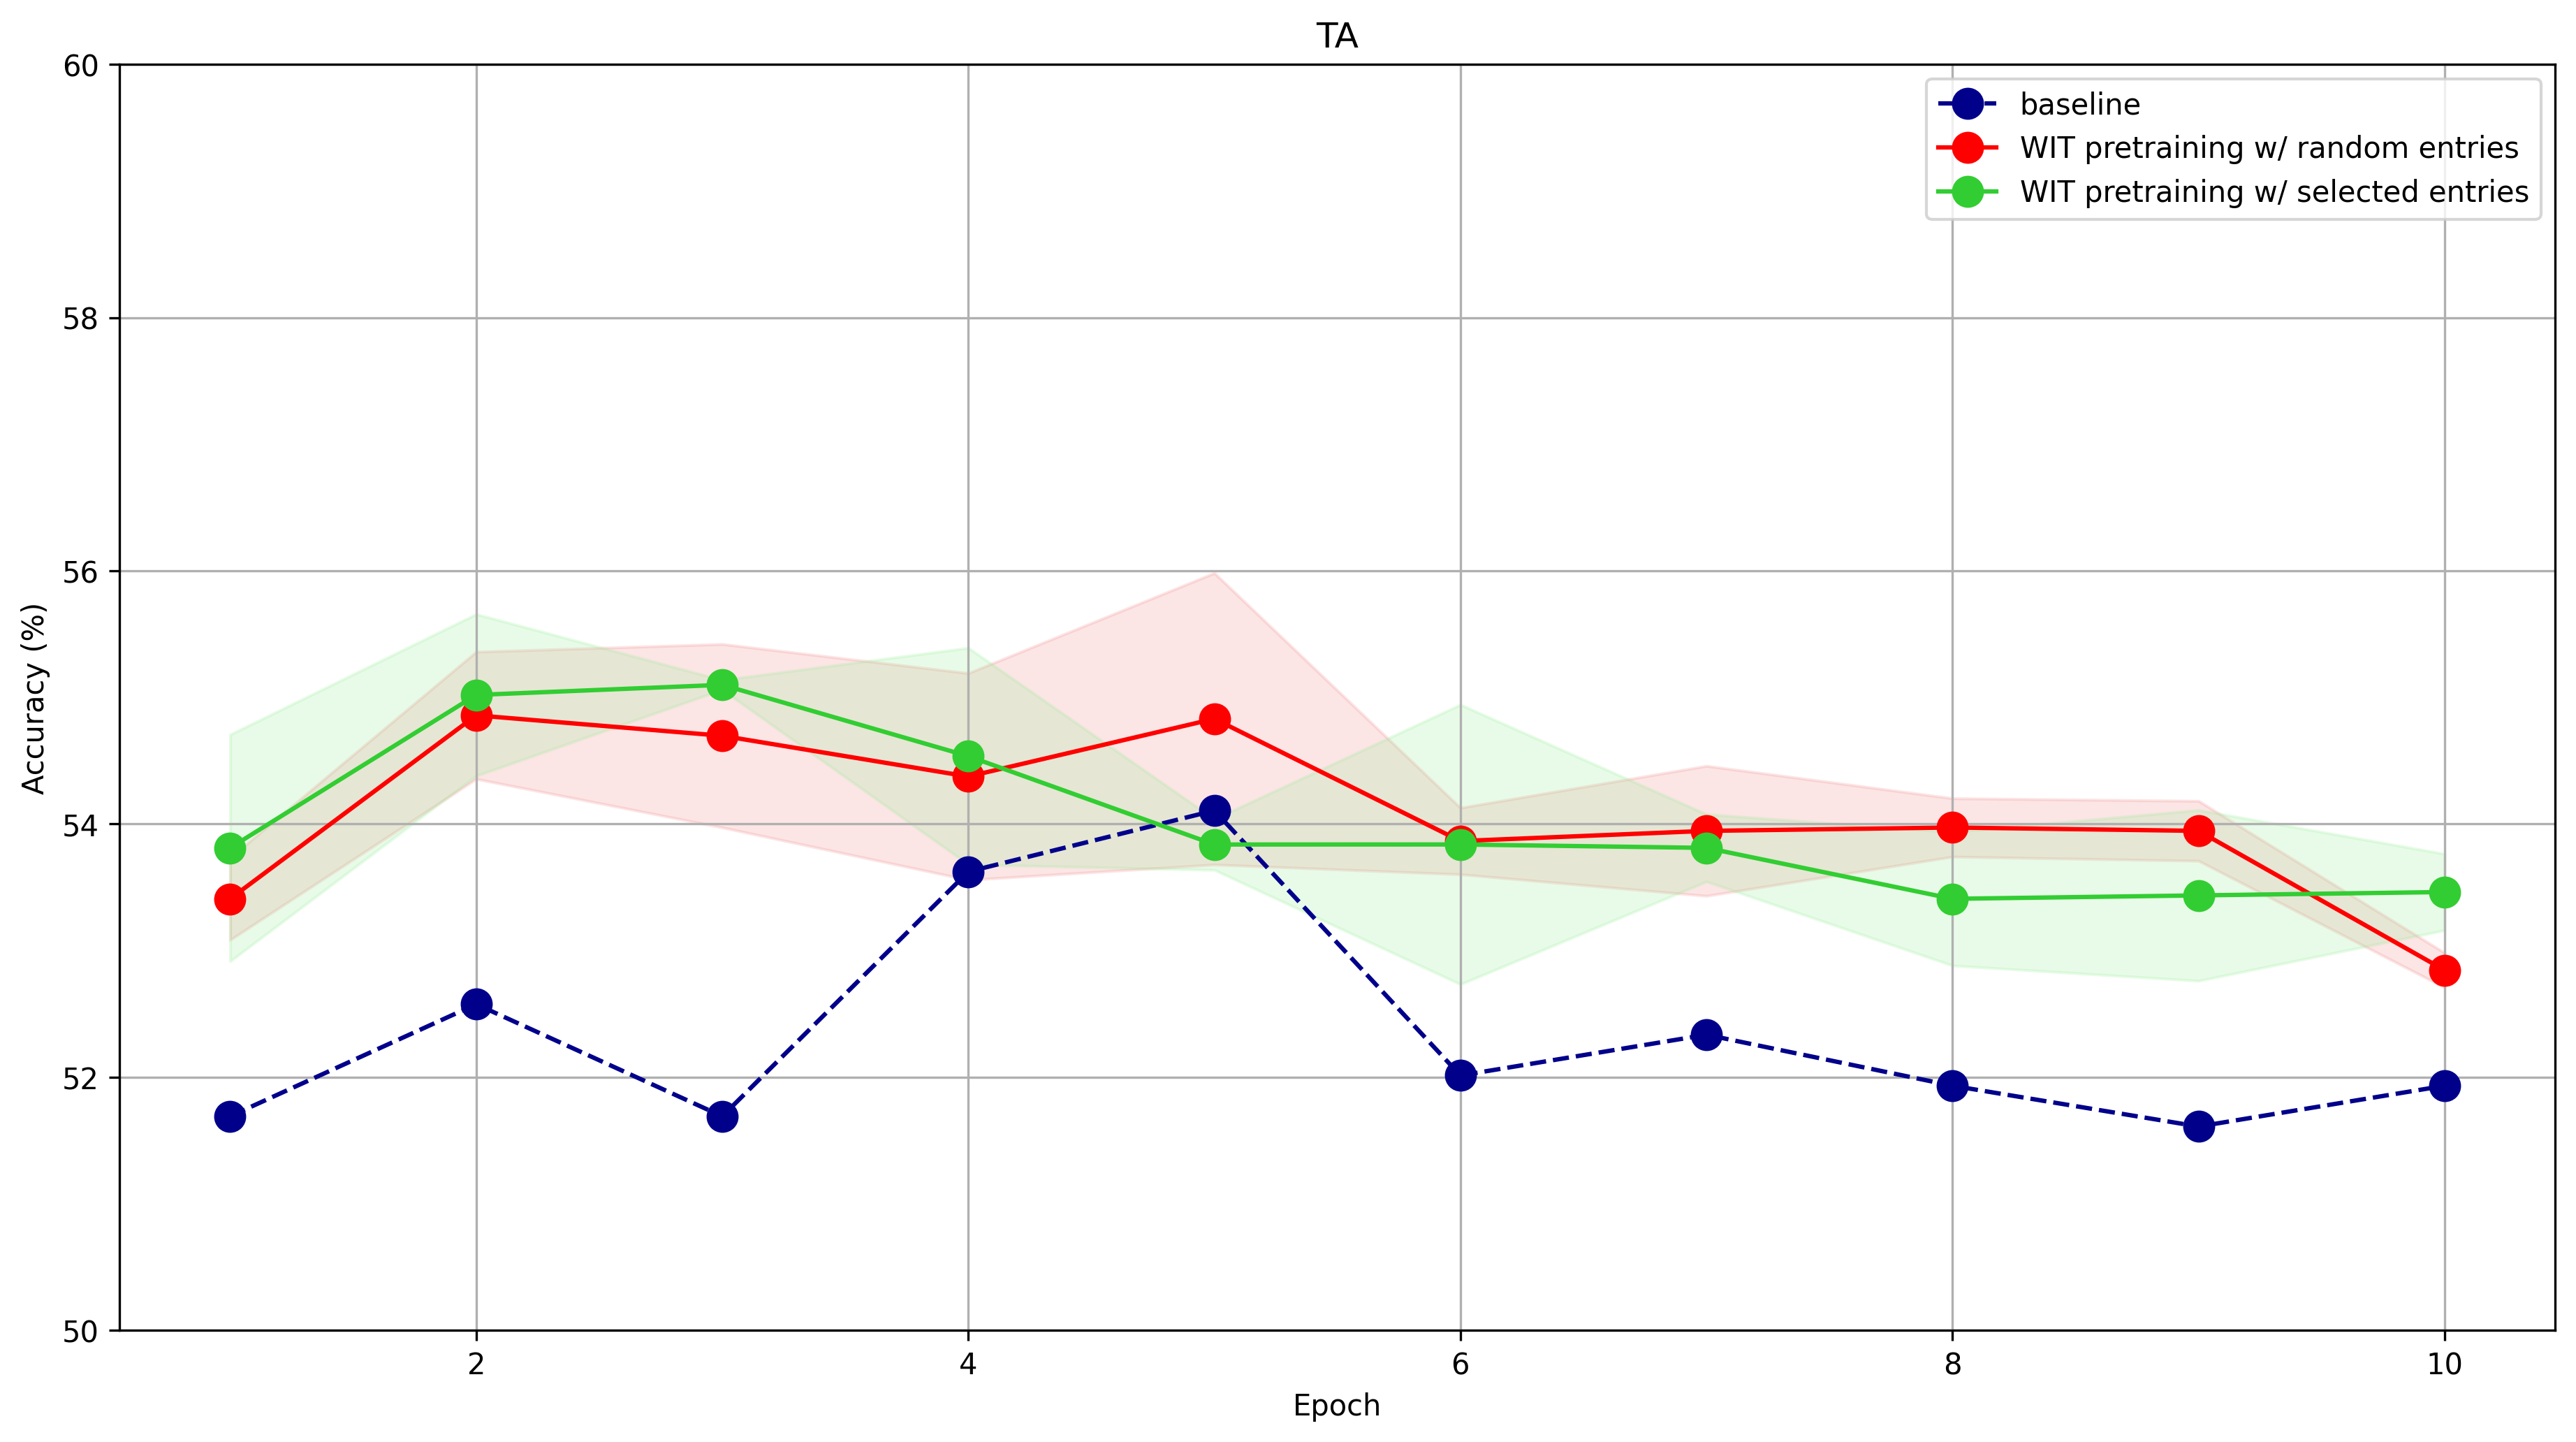

In [56]:
plot_results("TA", baseline_ta, random_means_ta, random_stds_ta, selected_means_ta, selected_stds_ta)

## TR

Baseline best performance

In [ ]:
get_random_data_best_avg("ta", lang_results)

(53.489, 0.6583879302255398)

Random data selection best performance

In [25]:
lang_results["tr"]["baseline"]["best"]

54.068

Smart selection data selection best performance

In [17]:
get_random_data_best_avg("tr", lang_results)

(55.87566666666667, 0.5238157012622743)

In [18]:
get_smart_selection_best_avg("tr", lang_results)

(56.92066666666667, 2.3004095770584456)

In [57]:
random_means_tr, random_stds_tr = get_random_data_avg_std("tr", lang_results)
selected_means_tr, selected_stds_tr = get_smart_selection_data_avg_std("tr", lang_results)
baseline_tr = get_baseline_results("tr", lang_results)

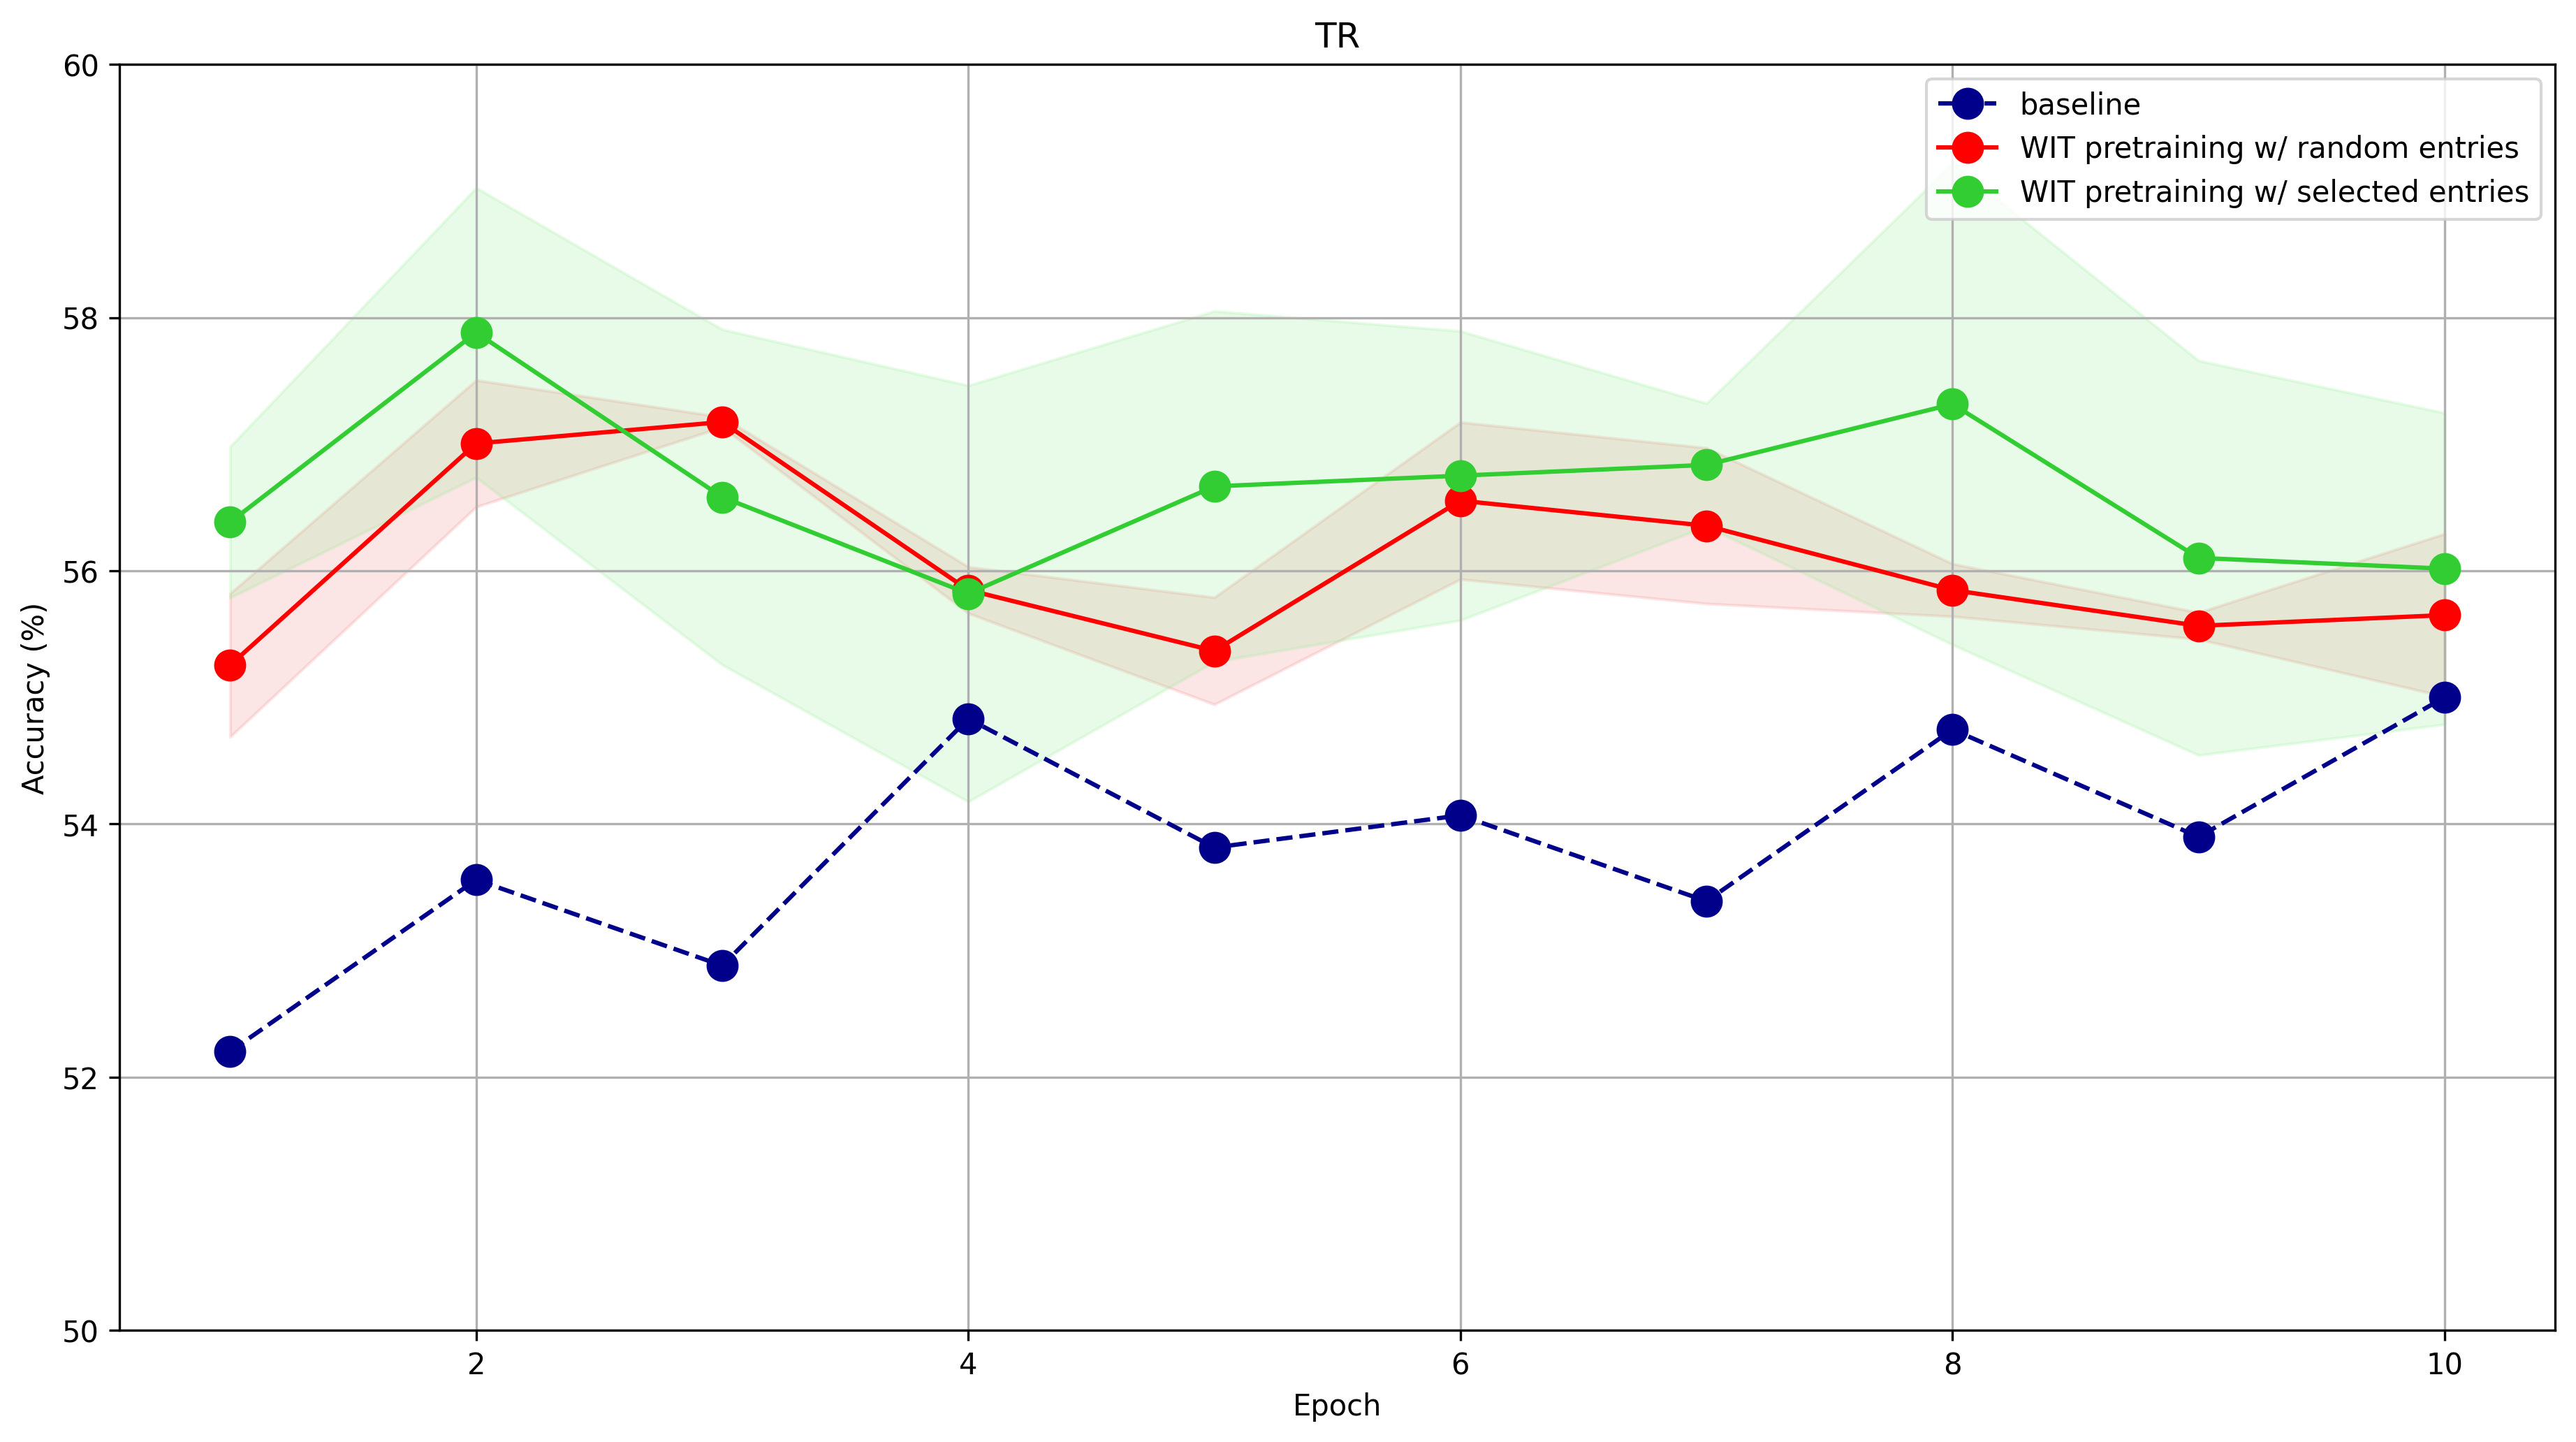

In [58]:
plot_results("TR", baseline_tr, random_means_tr, random_stds_tr, selected_means_tr, selected_stds_tr)

## ID

Baseline best performance

In [26]:
lang_results["id"]["baseline"]["best"]

55.23

Random data best performance

In [19]:
get_random_data_best_avg("id", lang_results)

(54.63933333333333, 0.20883220271042605)

Smart selection data selection best performance

In [20]:
get_smart_selection_best_avg("id", lang_results)

(56.50133333333333, 0.3985451319765719)

In [60]:
random_means_id, random_stds_id = get_random_data_avg_std("id", lang_results)
selected_means_id, selected_stds_id = get_smart_selection_data_avg_std("id", lang_results)
baseline_id = get_baseline_results("id", lang_results)

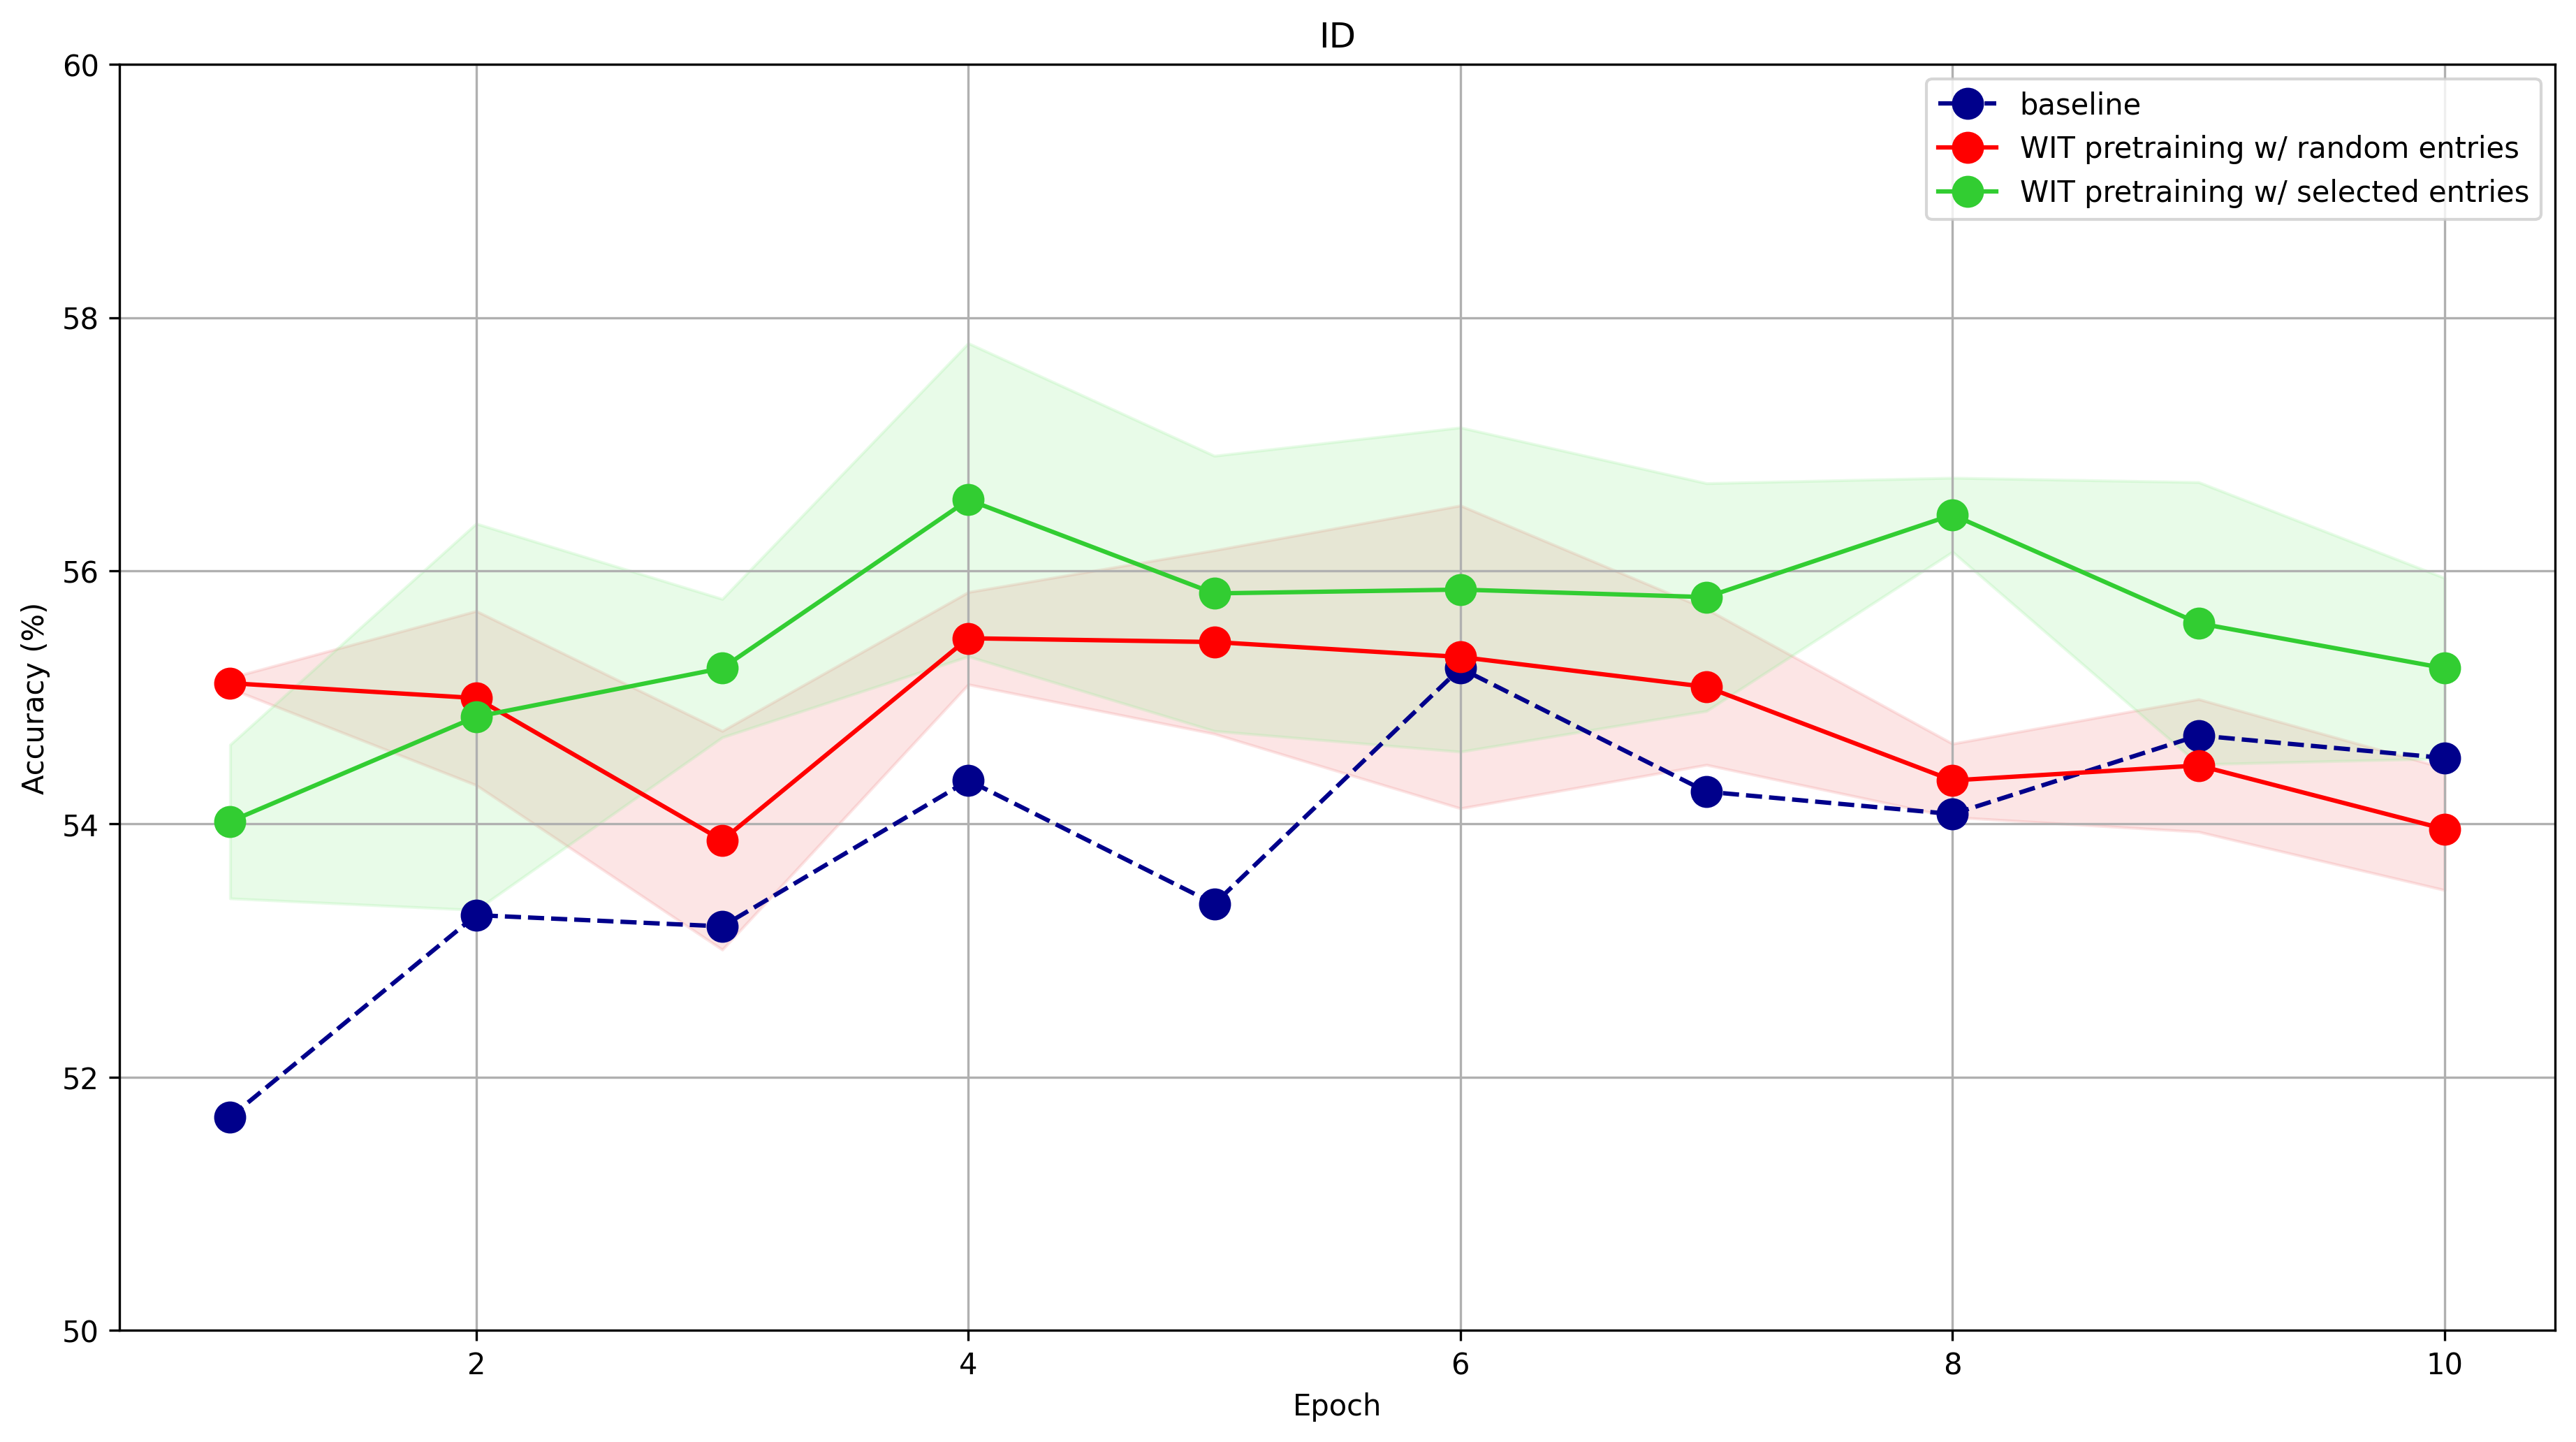

In [61]:
plot_results("ID", baseline_id, random_means_id, random_stds_id, selected_means_id, selected_stds_id)

## ZH

Baseline best performance

In [27]:
lang_results["zh"]["baseline"]["best"]

57.411

Random data best performance

In [21]:
get_random_data_best_avg("zh", lang_results)

(54.479666666666674, 1.2110382139121583)

Smart selection data selection best performance

In [22]:
get_smart_selection_best_avg("zh", lang_results)

(53.952666666666666, 0.9163988699736003)

In [62]:
random_means_zh, random_stds_zh = get_random_data_avg_std("zh", lang_results)
selected_means_zh, selected_stds_zh = get_smart_selection_data_avg_std("zh", lang_results)
baseline_zh = get_baseline_results("zh", lang_results)

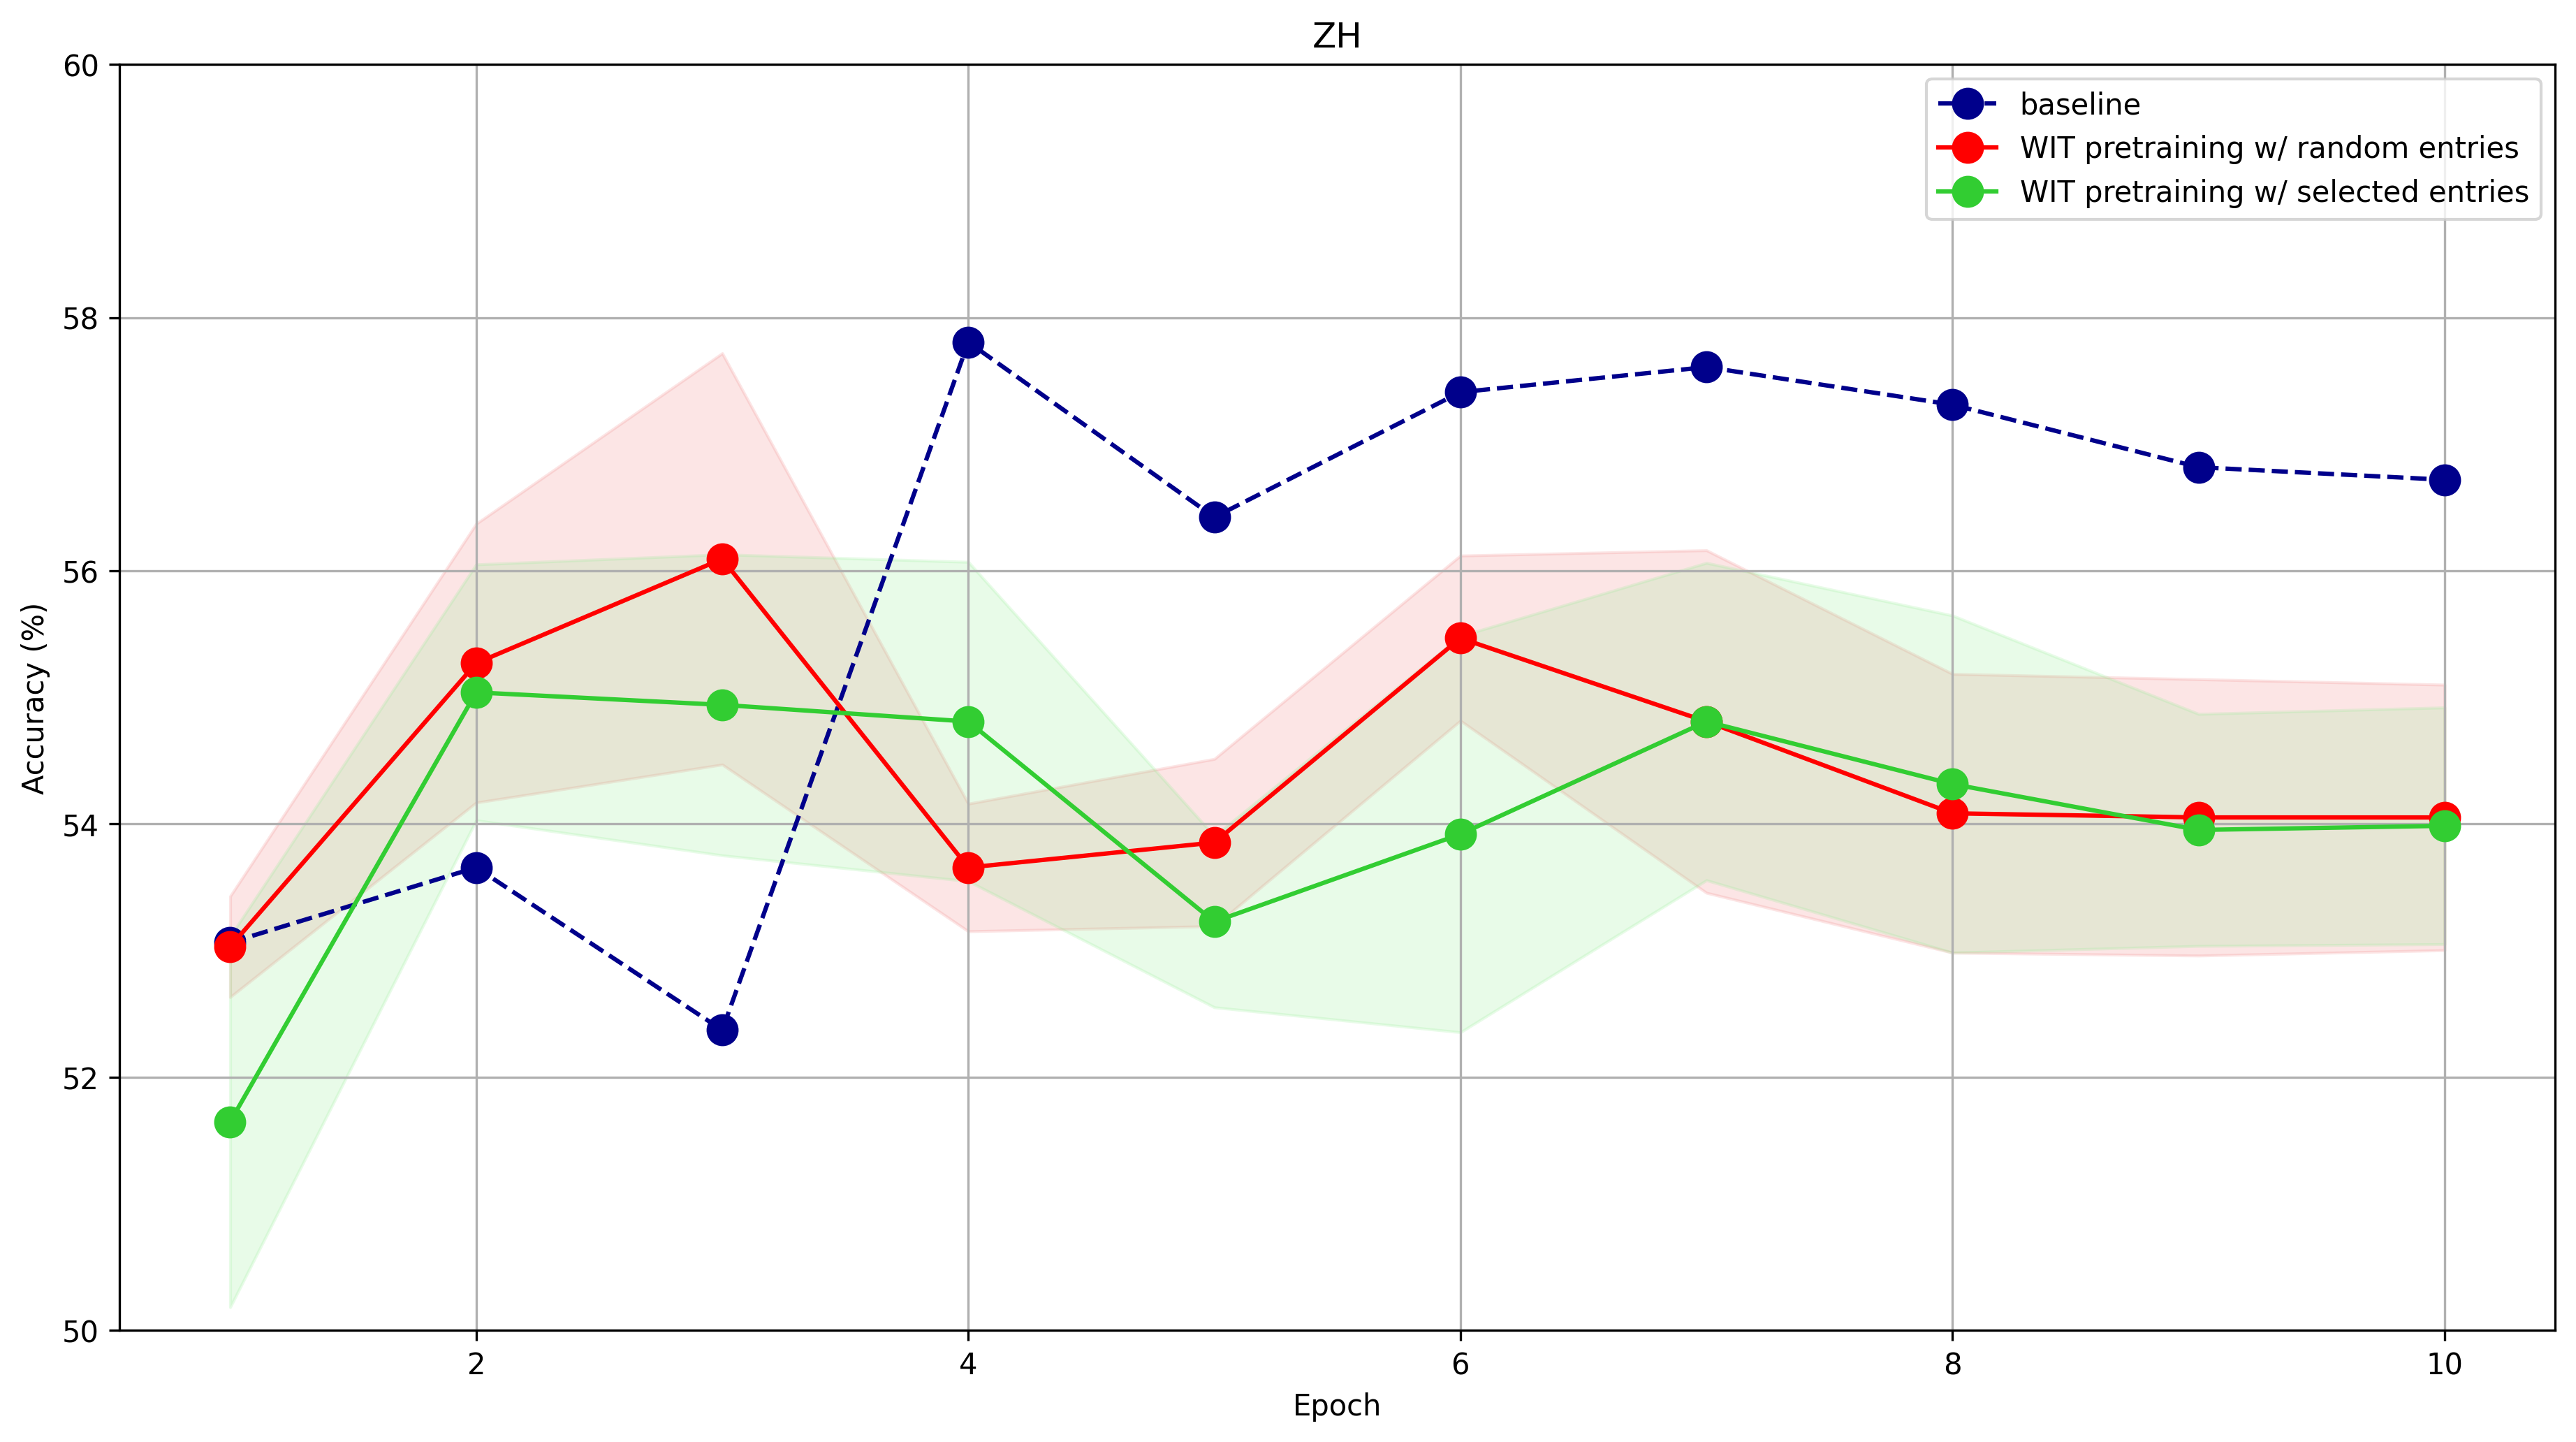

In [63]:
plot_results("ZH", baseline_zh, random_means_zh, random_stds_zh, selected_means_zh, selected_stds_zh)

## AVG of all models

Avg. across languages for the baseline model

In [32]:
baseline_best_mean = []

for lang in languages:
    baseline_best_mean.append(lang_results[lang]["baseline"]["best"])
print(np.asarray(baseline_best_mean).mean())    

54.1596


Avg. across languages for the random data models

In [30]:
random_best_mean = []

for lang in languages:
    random_best_mean.append(get_random_data_best_avg(lang, lang_results)[0])
print(np.asarray(random_best_mean).mean())

54.53906666666667


Avg. across languages for the smart selection data models

In [31]:
smart_selection_best_mean = []

for lang in languages:
    if lang == "sw":
        smart_selection_best_mean.append(get_random_data_best_avg(lang, lang_results)[0])
    else:
        smart_selection_best_mean.append(get_smart_selection_best_avg(lang, lang_results)[0])
print(np.asarray(smart_selection_best_means).mean())

54.982933333333335


In [64]:
baseline_means = []
for epoch in epochs:
    if epoch != "best":
        epoch_results = []
        for lang in languages:
            epoch_results.append(lang_results[lang]["baseline"][epoch])
        baseline_means.append(np.asarray(epoch_results).mean())

In [65]:
selected_means_all_lang = []
selected_stds_all_lang = []
for epoch in epochs:
    if epoch != "best":
        epoch_results = []
        for lang in languages:
            if lang != "sw":
                epoch_results.append(lang_results[lang]["smart_selection_1"][epoch])
                epoch_results.append(lang_results[lang]["smart_selection_2"][epoch])
                epoch_results.append(lang_results[lang]["smart_selection_3"][epoch])
            else:
                epoch_results.append(lang_results[lang]["seed1"][epoch])
                epoch_results.append(lang_results[lang]["seed2"][epoch])
                epoch_results.append(lang_results[lang]["seed3"][epoch])

        selected_means_all_lang.append(np.asarray(epoch_results).mean())
        selected_stds_all_lang.append(np.asarray(epoch_results).std())

In [66]:
random_means_all_lang = []
random_stds_all_lang = []
for epoch in epochs:
    if epoch != "best":
        epoch_results = []
        for lang in languages:
            epoch_results.append(lang_results[lang]["seed1"][epoch])
            epoch_results.append(lang_results[lang]["seed2"][epoch])
            epoch_results.append(lang_results[lang]["seed3"][epoch])

        random_means_all_lang.append(np.asarray(epoch_results).mean())
        random_stds_all_lang.append(np.asarray(epoch_results).std())

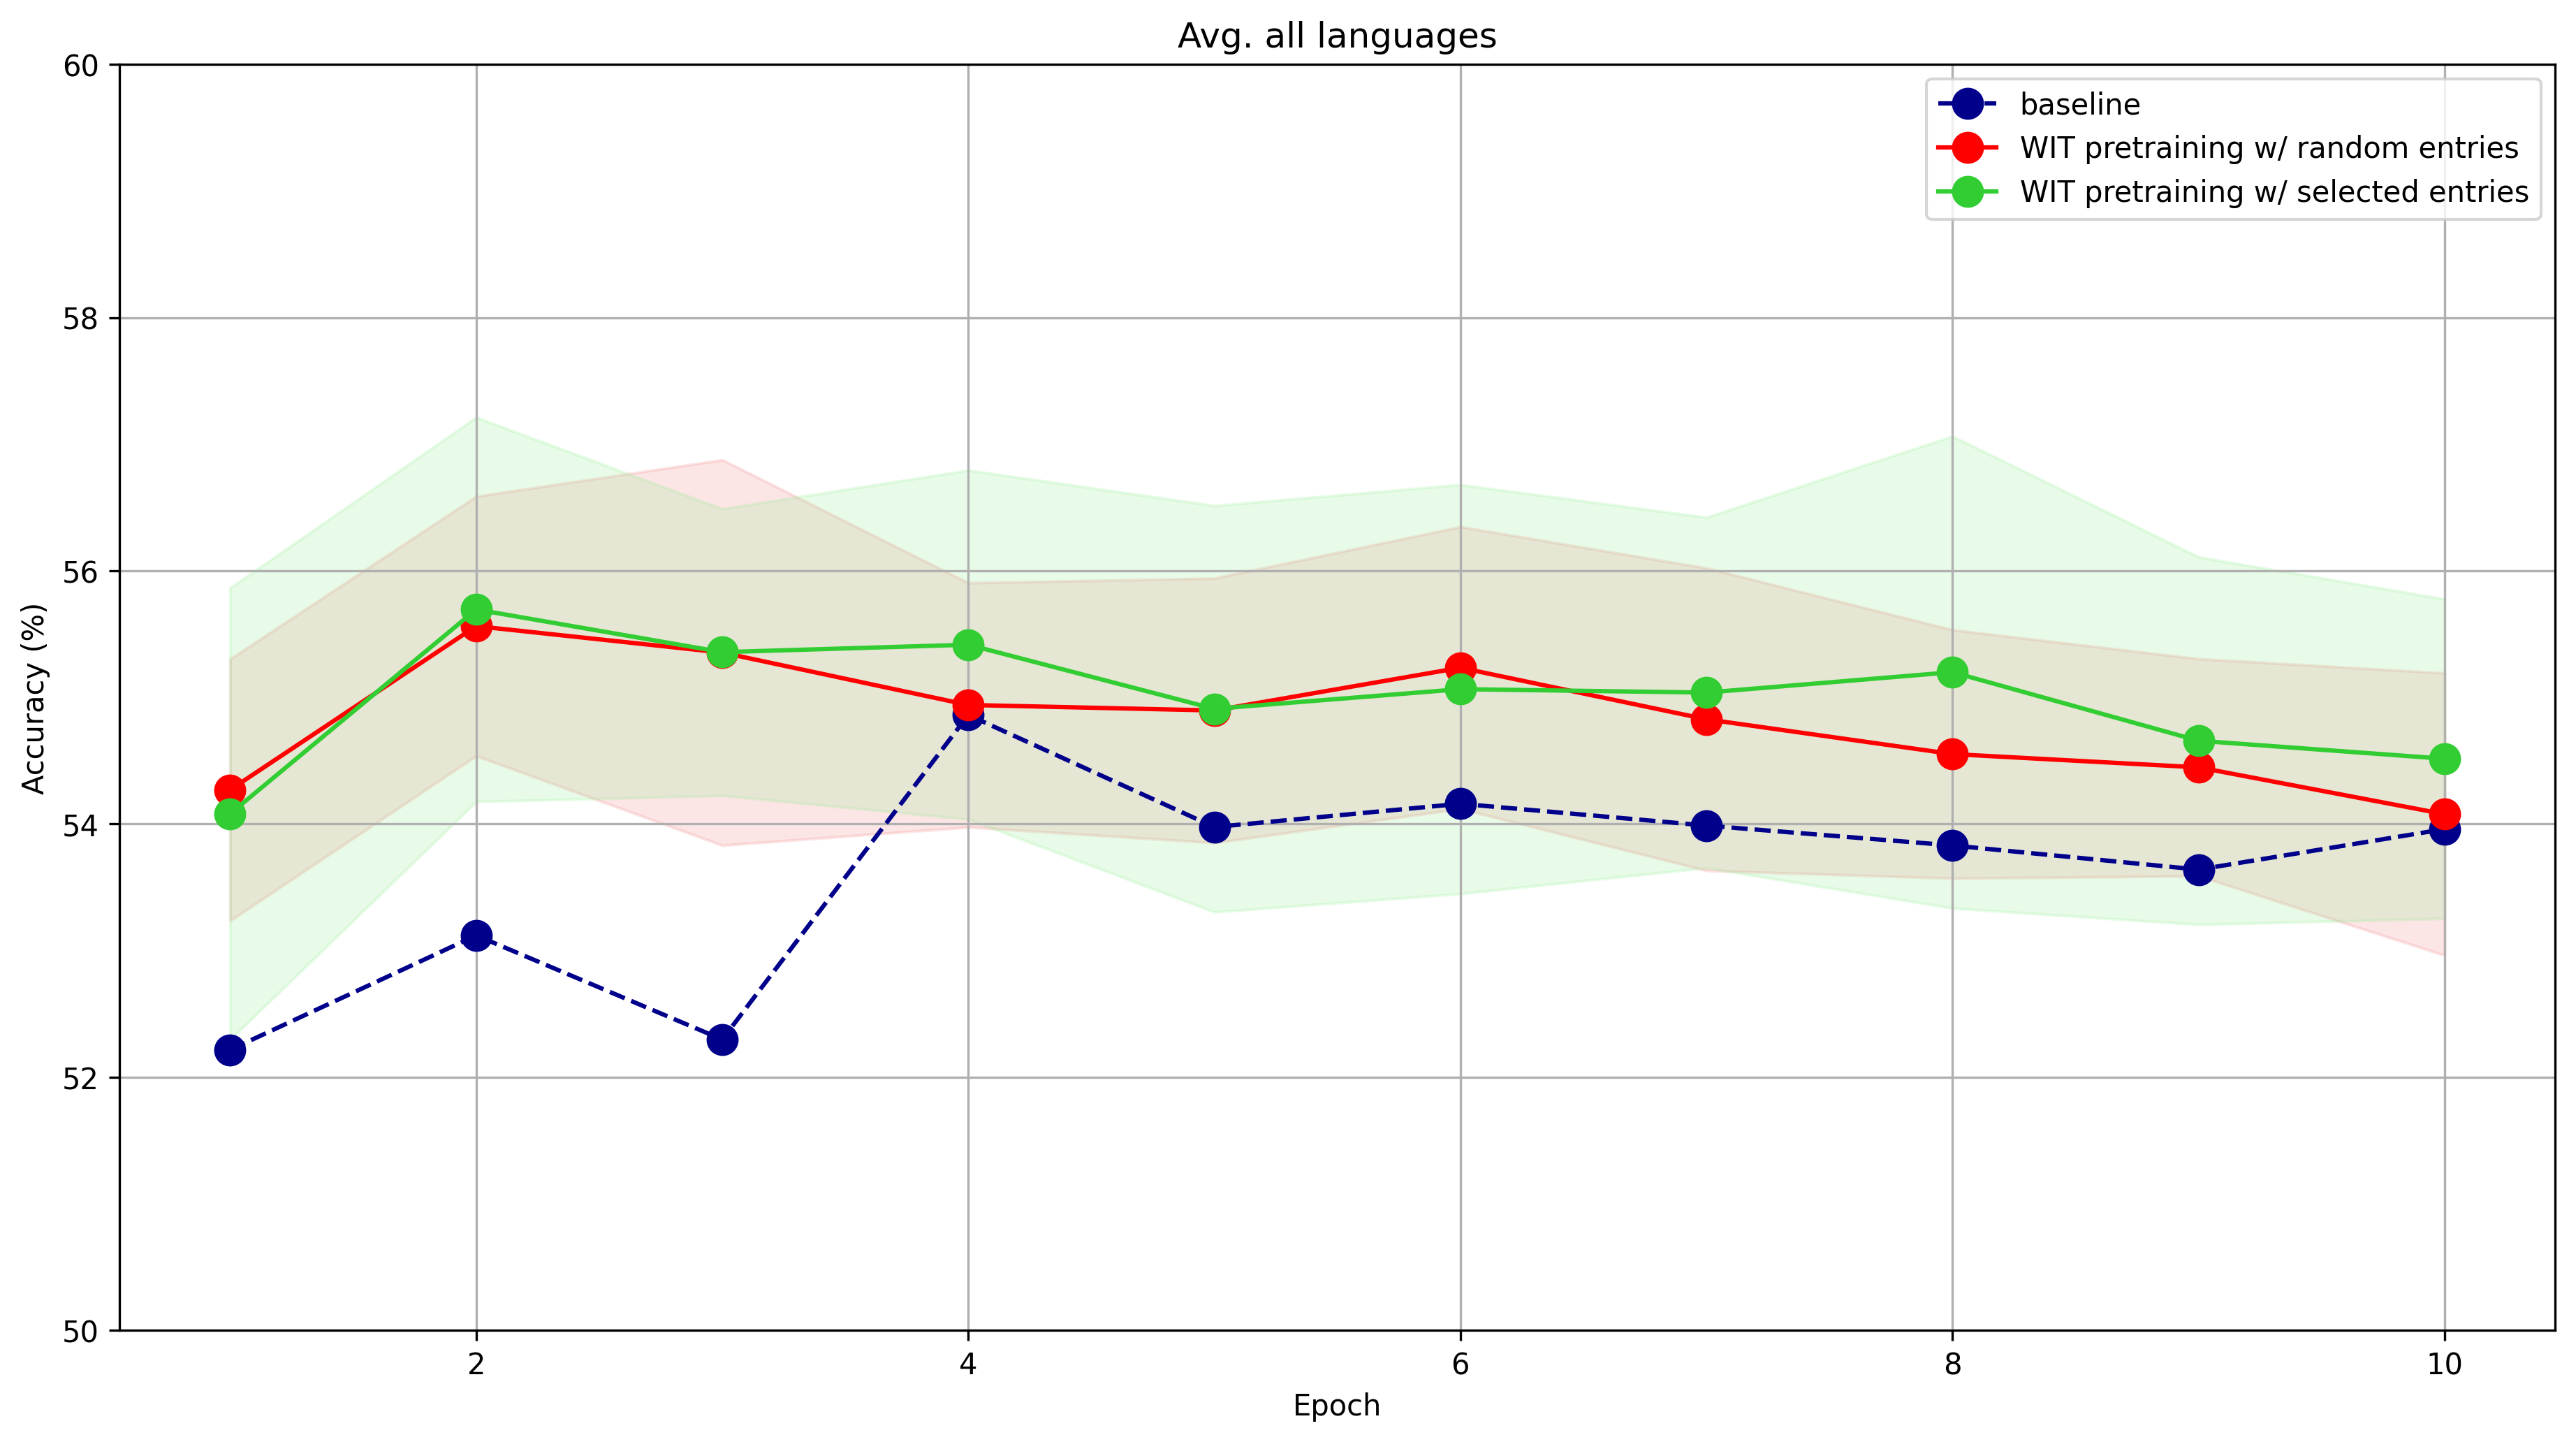

In [69]:
plot_results("Avg. all languages", baseline_means, random_means_all_lang, random_stds_all_lang, selected_means_all_lang, selected_stds_all_lang)